## Recognition Of Objects with Convolutional Neural Network
## - Ashwin Prakash

IMPORTING THE REQUIRED 

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from tensorflow.python.keras.utils import np_utils

LOADING AND SPLITTING THE DATA 

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 44s 0us/step


In [4]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [5]:
print(X_train[0].shape)

(32, 32, 3)


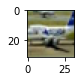

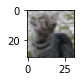

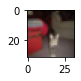

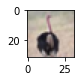

In [6]:

for i in range(332,336):
    plt.subplot(120+ 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()
    

PREPROCESSING THE DATA 

In [7]:


X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255
n_classes = 10


print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten



model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 199s 504ms/step - loss: 1.5686 - accuracy: 0.4243 - val_loss: 1.1705 - val_accuracy: 0.5846
Epoch 2/10
391/391 [==============================] - 255s 654ms/step - loss: 1.1063 - accuracy: 0.6088 - val_loss: 0.9083 - val_accuracy: 0.6808
Epoch 3/10
391/391 [==============================] - 259s 662ms/step - loss: 0.9184 - accuracy: 0.6758 - val_loss: 0.8062 - val_accuracy: 0.7195
Epoch 4/10
391/391 [==============================] - 261s 667ms/step - loss: 0.7996 - accuracy: 0.7207 - val_loss: 0.7516 - val_accuracy: 0.7421
Epoch 5/10
391/391 [==============================] - 270s 692ms/step - loss: 0.7208 - accuracy: 0.7496 - val_loss: 0.7260 - val_accuracy: 0.7471
Epoch 6/10
391/391 [==============================] - 302s 772ms/step - loss: 0.6457 - accuracy: 0.7745 - val_loss: 0.6910 - val_accuracy: 0.7655
Epoch 7/10
391/391 [==============================] - 305s 781ms/step - loss: 0.5894 - accuracy: 0.7950 - val_loss: 0.6814 -

PREDICTING 

In [20]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[500:509]
labels = np.argmax(Y_test[500:509],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 22ms/step


In [21]:
print (predictions)

[[3.3367607e-05 6.1269293e-06 4.4781953e-02 6.5582334e-03 4.0327382e-01
  3.9320779e-03 5.3847742e-01 2.8968947e-03 9.0615540e-06 3.1135805e-05]
 [3.4460680e-07 3.5634793e-07 2.4655904e-03 4.1643757e-04 5.3135050e-03
  6.1935061e-05 9.9173963e-01 2.0603559e-06 6.7770507e-08 9.7267844e-08]
 [2.4831759e-05 5.2708260e-06 1.3984166e-03 4.2417970e-01 1.6285539e-04
  5.7303977e-01 7.4347405e-04 3.5082438e-04 4.3019951e-05 5.1795356e-05]
 [1.7540852e-03 5.9873822e-05 7.5869910e-02 1.0465776e-01 6.9555545e-01
  4.6971694e-02 1.9618741e-03 7.1385950e-02 6.4712344e-04 1.1362873e-03]
 [6.3206494e-07 1.7901174e-04 7.6275395e-09 8.7205542e-08 4.4214646e-10
  8.1403567e-10 3.3759124e-09 4.1277350e-09 3.2184167e-07 9.9981993e-01]
 [3.4561597e-03 2.5379841e-06 9.7623104e-03 4.6350807e-03 9.7742724e-01
  3.0569020e-03 3.5744958e-04 1.1611183e-03 1.3623371e-04 5.0018712e-06]
 [5.4512425e-06 1.0019696e-07 6.7002879e-04 2.8700277e-03 2.8827160e-03
  6.3538379e-03 2.6530597e-06 9.8720318e-01 8.2016285e-08 

In [22]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
0.99999994
1.0
1.0
1.0
0.99999994
1.0
0.9999999


In [23]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[6 6 5 4 9 4 7 9 9]


FINAL OBJECT DETECTION 

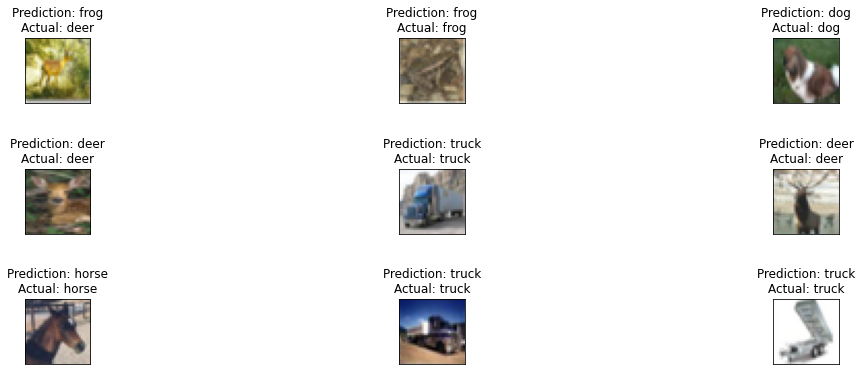

In [24]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()